In [17]:
!pip install dython pandas

In [18]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from sklearn.utils import resample
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm

In [19]:
art_dir = 'data/toy-art-data/toy_dataset'
data_desrc_dir = 'data/toy-art-data/toy_dataset_label.csv'
data_descr = pd.read_csv(data_desrc_dir, sep='\t')

In [20]:
labels_df = data_descr.drop(columns=['TITLE', 'DATE', 'LOCATION', 'URL', 'BORN-DIED'])

In [21]:
labels_df['TECHNIQUE'] = labels_df['TECHNIQUE'].str.extract('(([a-zA-Z]+\s*)+,?)').replace(',','', regex=True)[0]
techniques = labels_df['TECHNIQUE'].value_counts()[labels_df['TECHNIQUE'].value_counts() >= 30].index.tolist()
for tech_label in labels_df['TECHNIQUE'].unique():
  if tech_label not in techniques:
    labels_df['TECHNIQUE'] = labels_df['TECHNIQUE'].replace(tech_label, '-')

In [22]:
for label in labels_df['AUTHOR'].value_counts().index:
  if labels_df['AUTHOR'].value_counts()[label] < 10:
    labels_df['AUTHOR'] = labels_df['AUTHOR'].replace(label, '-')
  if ('MINIATURIST' or 'PAINTER' or 'UNKNOWN' or 'SCULPTOR') in label:
    labels_df['AUTHOR'] = labels_df['AUTHOR'].replace(label, 'UNKNOWN')

In [23]:
labels_df = labels_df[(labels_df['FORM'] == 'painting') | (labels_df['FORM'] == 'tapestry') | (labels_df['FORM'] == 'graphics')] 

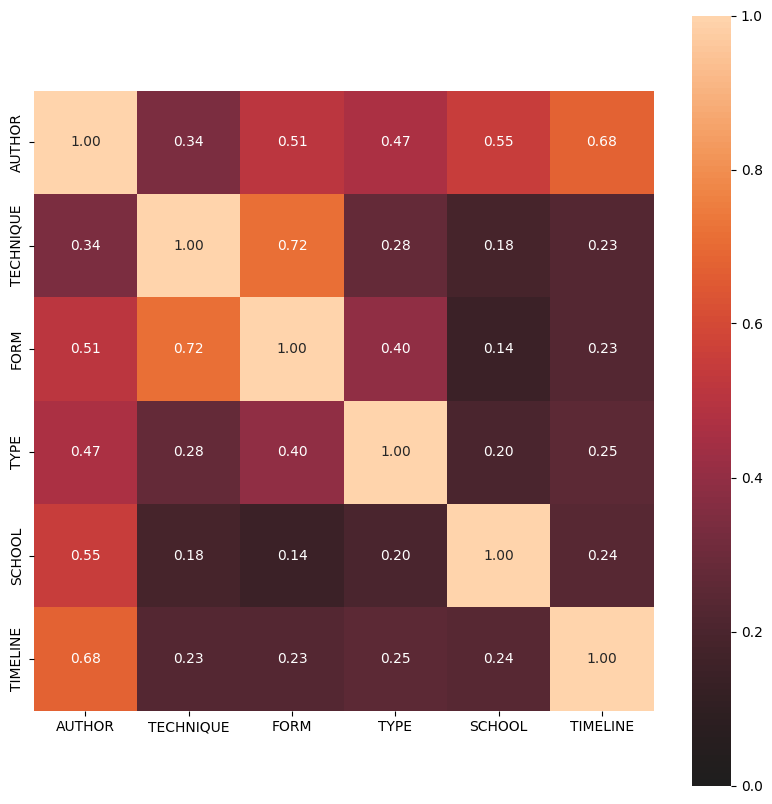

In [24]:
complete_correlation = associations(labels_df.drop(columns=['FILE', 'ID']), figsize=(10,10))

In [25]:
labels_df = labels_df.dropna()

In [26]:
labels_df.shape

(33929, 8)

In [27]:
labels_teq_ru = ['Масло на меди', 'Масло на холсте', '-', 'Дерево', 'Масло на панели', 'Масло на картоне', 'Гравюра', 'Рисунок', 'Фреска', 'Масло на дубовой панели', 'Масло на дереве', 'Масло на дубе', 'Темпера на панели', 'Панель', 'Акварель', 'Ксилография', 'Темпера и золото на дереве', 'Темпера на дереве', 'Масло на холсте, переведённое с дерева', 'Липа', 'Офорт', 'Перо', 'Яичная темпера на дереве', 'Фото', 'Красный мел', 'Масло на тополиной панели', 'Темпера и золото на панели', 'Тополь', 'Отдельная фреска', 'Тополиная панель', 'Гобелен', 'Карандаш', 'Перо и коричневые чернила', 'Акварель на бумаге', 'Манускрипт', 'Слоновая кость', 'Темпера на холсте', 'Перо и чернила на бумаге', 'Масло на бумаге', 'Чёрный мел', 'Мрамор', 'Темпера на тополиной панели', 'Масло и темпера на панели', 'Дуб', 'Темпера и масло на дереве', 'Камень', 'Бронза', 'Литография', 'Масло и темпера на дереве', 'Серебро', 'Перо и чернила', 'Пастель на бумаге', 'Терракота', 'Пастель', 'Раскрашенное дерево', 'Медь', 'Масло и темпера на липе', 'Масло и темпера на красном буке', 'Манускрипт', 'Стукко', 'Витраж', 'Позолоченная бронза', 'Ореховое масло на штукатурке']
translation_dict = dict(zip(list(labels_df['TECHNIQUE'].unique()), labels_teq_ru))
labels_df['TECHNIQUE'] = labels_df['TECHNIQUE'].map(translation_dict)

In [28]:
print(labels_df['TECHNIQUE'].value_counts())

TECHNIQUE
Масло на холсте        13667
Фреска                  4309
-                       3392
Масло на панели         3050
Масло на дереве         1850
                       ...  
Камень                     4
Позолоченная бронза        3
Серебро                    2
Стукко                     2
Витраж                     1
Name: count, Length: 62, dtype: int64


<Axes: xlabel='TECHNIQUE'>

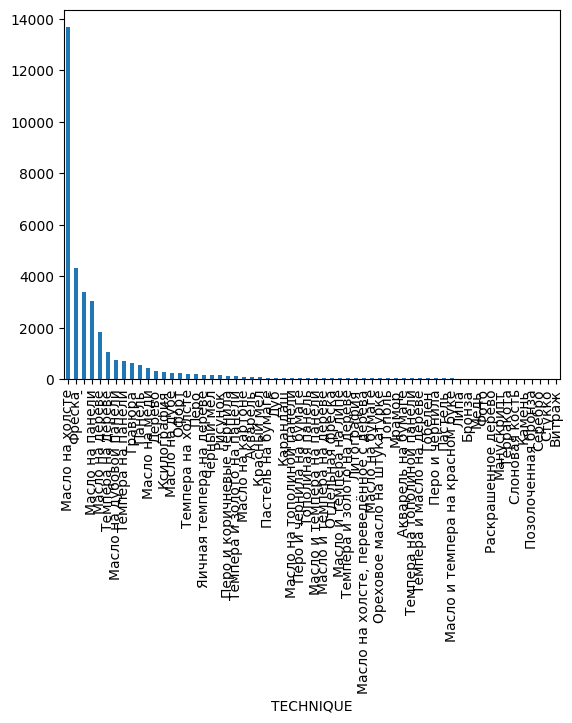

In [29]:
labels_df['TECHNIQUE'].value_counts().plot(kind='bar')

In [ ]:
print(list(labels_df['TYPE'].unique()))

In [30]:
labels_type_ru = ['мифологический', 'жанровый', 'портрет', 'пейзаж', 'религиозный', 'другой', 'исторический', 'интерьер', 'натюрморт', 'этюд']
translation_dict = dict(zip(list(labels_df['TYPE'].unique()), labels_type_ru))
labels_df['TYPE'] = labels_df['TYPE'].map(translation_dict)

<Axes: xlabel='TYPE'>

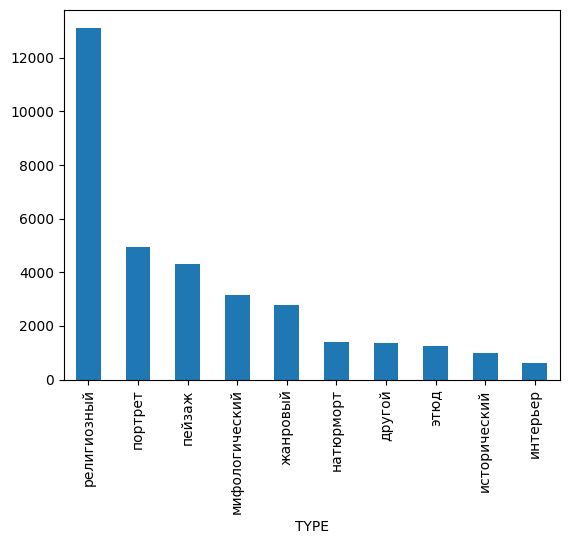

In [32]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [33]:
labels_df['TYPE'].value_counts()

TYPE
религиозный       13125
портрет            4941
пейзаж             4328
мифологический     3159
жанровый           2770
натюрморт          1396
другой             1348
этюд               1265
исторический        981
интерьер            616
Name: count, dtype: int64

<Axes: xlabel='TYPE'>

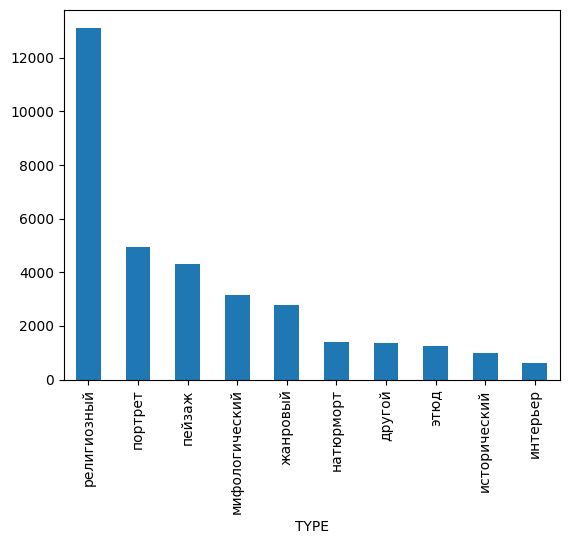

In [34]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [ ]:
print(list(labels_df['SCHOOL'].unique()))

In [35]:
labels_school_ru = ['немецкий', 'датский', 'испанский', 'итальянский', 'французский', 'фламандский', 'голландский', 'нидерландский', 'швейцарский', 'русский', 'греческий', 'другой', 'американский', 'английский', 'австрийский', 'шотландский', 'богемский', 'ирландский', 'бельгийский', 'португальский', 'венгерский', 'каталонский', 'шведский', 'польский', 'норвежский', 'финский']
translation_dict = dict(zip(list(labels_df['SCHOOL'].unique()), labels_school_ru))
labels_df['SCHOOL'] = labels_df['SCHOOL'].map(translation_dict)

In [37]:
labels_df['SCHOOL'].value_counts()

SCHOOL
итальянский      14050
голландский       4934
французский       4602
фламандский       3491
немецкий          2531
испанский         1282
английский         740
нидерландский      635
венгерский         360
австрийский        315
американский       180
швейцарский        146
русский            125
бельгийский         81
шотландский         76
датский             65
каталонский         50
богемский           47
греческий           47
другой              35
ирландский          33
шведский            32
польский            23
португальский       22
норвежский          22
финский              5
Name: count, dtype: int64

<Axes: xlabel='SCHOOL'>

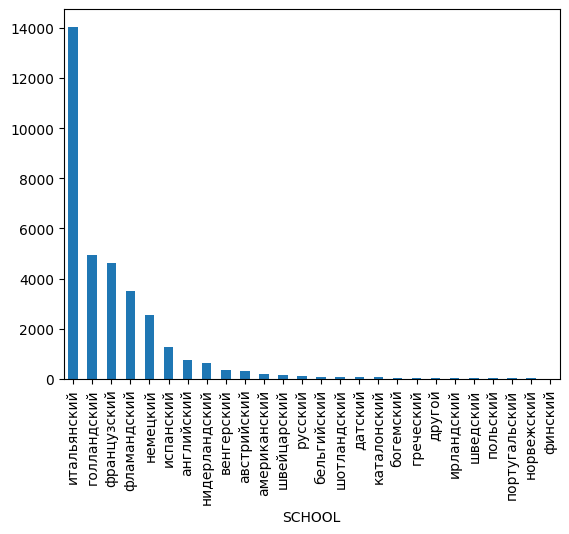

In [38]:
labels_df['SCHOOL'].value_counts().plot(kind='bar')

In [ ]:
print(list(labels_df['TIMELINE'].unique()))

In [39]:
time_periods = {
    "1601-1650": "первая половина семнадцатого века",
    "1851-1900": "вторая половина девятнадцатого века",
    "1451-1500": "вторая половина пятнадцатого века",
    "1501-1550": "первая половина шестнадцатого века",
    "1751-1800": "вторая половина восемнадцатого века",
    "1801-1850": "первая половина девятнадцатого века",
    "1701-1750": "первая половина восемнадцатого века",
    "1651-1700": "вторая половина семнадцатого века",
    "1401-1450": "первая половина пятнадцатого века",
    "1351-1400": "вторая половина четырнадцатого века",
    "1551-1600": "вторая половина шестнадцатого века",
    "1301-1350": "первая половина четырнадцатого века",
    "1201-1250": "первая половина тринадцатого века",
    "1251-1300": "вторая половина тринадцатого века",
    "1151-1200": "вторая половина двенадцатого века",
    "1101-1150": "первая половина двенадцатого века",
    "0751-0800": "вторая половина восьмого века",
    "1051-1100": "вторая половина одиннадцатого века",
    "0951-1000": "вторая половина десятого века",
    "0801-0850": "первая половина девятого века",
    "0851-0900": "вторая половина девятого века",
    "1001-1050": "первая половина одиннадцатого века"
}

labels_df['TIMELINE'] = labels_df['TIMELINE'].map(time_periods)

In [41]:
labels_df['TIMELINE'].value_counts()

TIMELINE
первая половина семнадцатого века      5569
первая половина шестнадцатого века     5374
вторая половина пятнадцатого века      3926
вторая половина семнадцатого века      3354
вторая половина девятнадцатого века    3132
вторая половина шестнадцатого века     2828
первая половина восемнадцатого века    2270
первая половина девятнадцатого века    1829
вторая половина восемнадцатого века    1759
первая половина пятнадцатого века      1621
первая половина четырнадцатого века    1316
вторая половина четырнадцатого века     556
вторая половина тринадцатого века       219
вторая половина одиннадцатого века       59
первая половина тринадцатого века        45
вторая половина двенадцатого века        31
первая половина двенадцатого века        23
вторая половина десятого века             5
первая половина девятого века             5
вторая половина восьмого века             4
вторая половина девятого века             3
первая половина одиннадцатого века        1
Name: count, dtype: int

<Axes: xlabel='TIMELINE'>

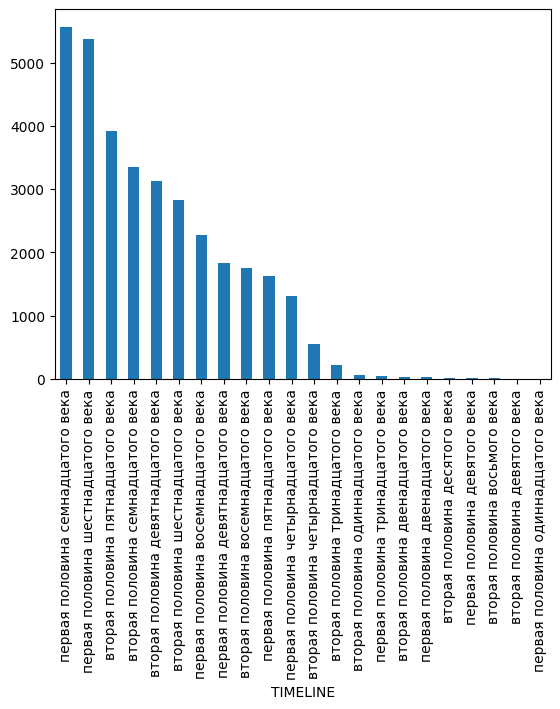

In [42]:
labels_df['TIMELINE'].value_counts().plot(kind='bar')

In [43]:
for id in tqdm(['TECHNIQUE', 'TYPE', 'TIMELINE', 'SCHOOL']):
    for val in tqdm(labels_df[id].value_counts().index):
        avg = int(labels_df[id].value_counts().mean()) + 500
        if labels_df[id].value_counts()[val] <= avg:
            minority_class = labels_df[labels_df[id] == val]
            majority_class = labels_df[labels_df[id] != val]
            minority_upsampled = resample(minority_class, replace=True, n_samples=avg, random_state=42)
            labels_df = pd.concat([majority_class, minority_upsampled])
        else: 
            majority_class = labels_df[labels_df[id] == val]
            minority_class = labels_df[labels_df[id] != val]
            majority_downsampled = resample(majority_class, replace=False, n_samples=avg, random_state=42)
            labels_df = pd.concat([minority_class, majority_downsampled])

100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


In [44]:
labels_df.reset_index(inplace=True)

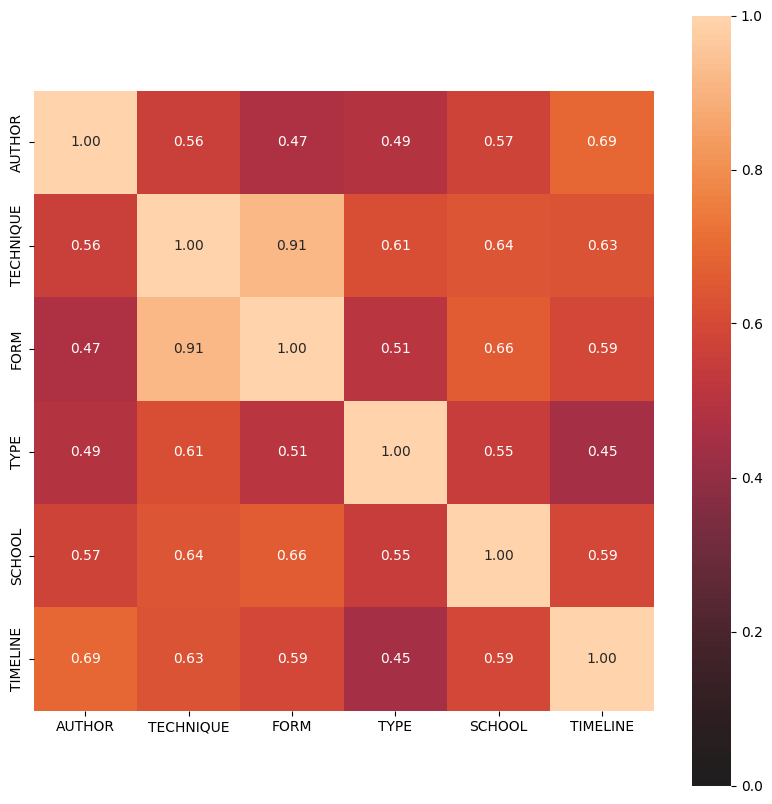

In [45]:
complete_correlation = associations(labels_df.drop(columns=['FILE', 'ID', 'index']), figsize=(10,10))

In [46]:
len(labels_df['FILE'].unique())

2631

In [47]:
labels_df['TUPLES'] = [(labels_df['TECHNIQUE'][i], labels_df['TYPE'][i], labels_df['SCHOOL'][i], labels_df['TIMELINE'][i]) for i in labels_df.index]

In [48]:
labels_df.shape

(31742, 10)

In [49]:
labels_df['TECHNIQUE'].value_counts()

TECHNIQUE
Масло на холсте               3035
Масло на бумаге               2517
Темпера на панели             2336
-                             1896
Акварель на бумаге            1597
                              ... 
Позолоченная бронза             43
Масло на тополиной панели       40
Темпера и золото на дереве      36
Темпера и масло на дереве       31
Масло и темпера на липе         29
Name: count, Length: 62, dtype: int64

<Axes: xlabel='TECHNIQUE'>

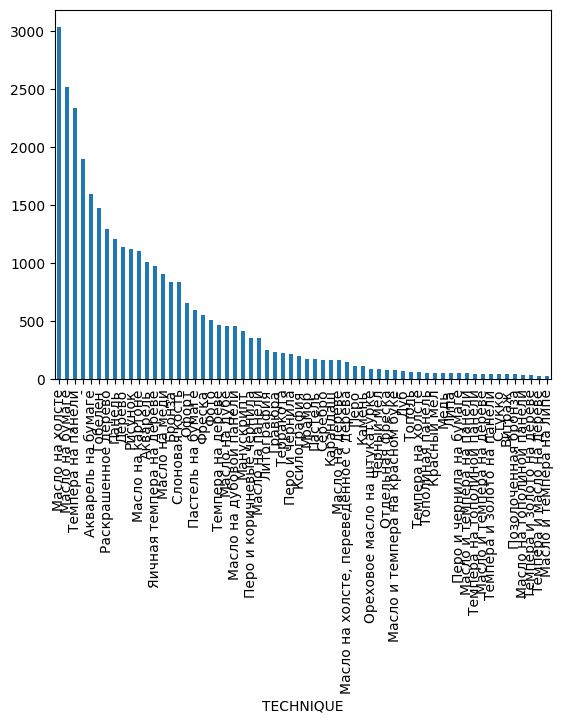

In [50]:
labels_df['TECHNIQUE'].value_counts().plot(kind='bar')

In [51]:
labels_df['TYPE'].value_counts()

TYPE
религиозный       9746
пейзаж            6008
жанровый          3590
натюрморт         2720
портрет           2596
другой            1909
исторический      1816
интерьер          1426
мифологический    1057
этюд               874
Name: count, dtype: int64

<Axes: xlabel='TYPE'>

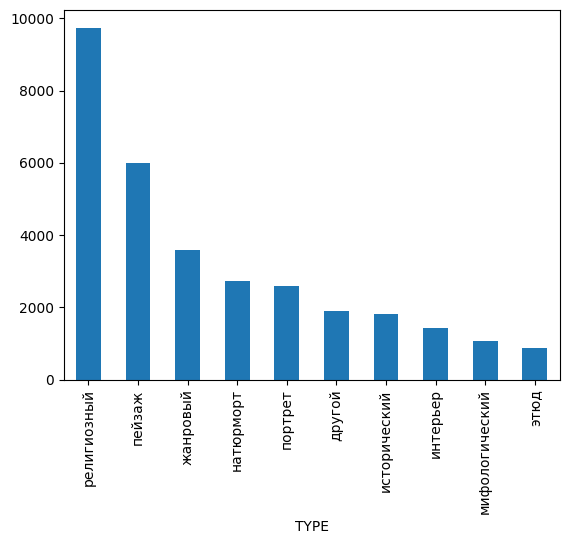

In [52]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [53]:
labels_df['SCHOOL'].value_counts()

SCHOOL
итальянский      2006
португальский    1701
ирландский       1636
богемский        1573
норвежский       1513
другой           1456
французский      1446
датский          1400
польский         1347
американский     1296
немецкий         1282
шотландский      1247
греческий        1201
австрийский      1159
голландский      1140
нидерландский    1121
швейцарский      1092
каталонский      1085
бельгийский      1050
фламандский      1046
венгерский       1018
испанский         999
шведский          989
английский        976
русский           963
Name: count, dtype: int64

<Axes: xlabel='SCHOOL'>

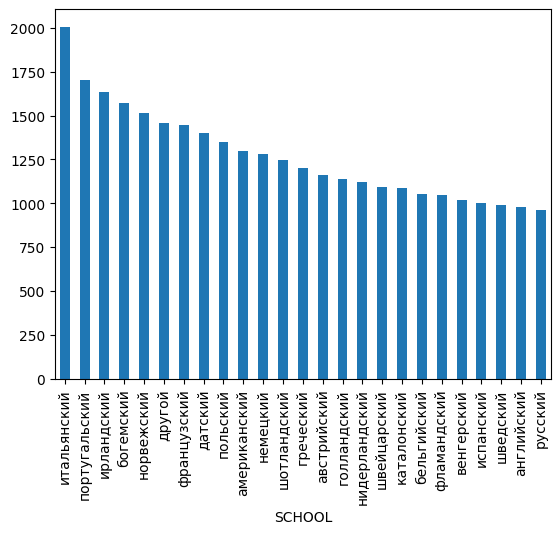

In [54]:
labels_df['SCHOOL'].value_counts().plot(kind='bar')

In [55]:
labels_df['TIMELINE'].value_counts()

TIMELINE
вторая половина девятнадцатого века    5386
первая половина девятнадцатого века    5180
вторая половина четырнадцатого века    4171
вторая половина восемнадцатого века    3650
первая половина восемнадцатого века    1987
вторая половина одиннадцатого века     1930
первая половина шестнадцатого века     1522
первая половина двенадцатого века      1296
вторая половина семнадцатого века      1097
первая половина семнадцатого века       890
вторая половина двенадцатого века       870
вторая половина пятнадцатого века       847
вторая половина шестнадцатого века      787
вторая половина тринадцатого века       635
первая половина тринадцатого века       583
первая половина пятнадцатого века       364
вторая половина девятого века           284
первая половина четырнадцатого века     263
Name: count, dtype: int64

<Axes: xlabel='TIMELINE'>

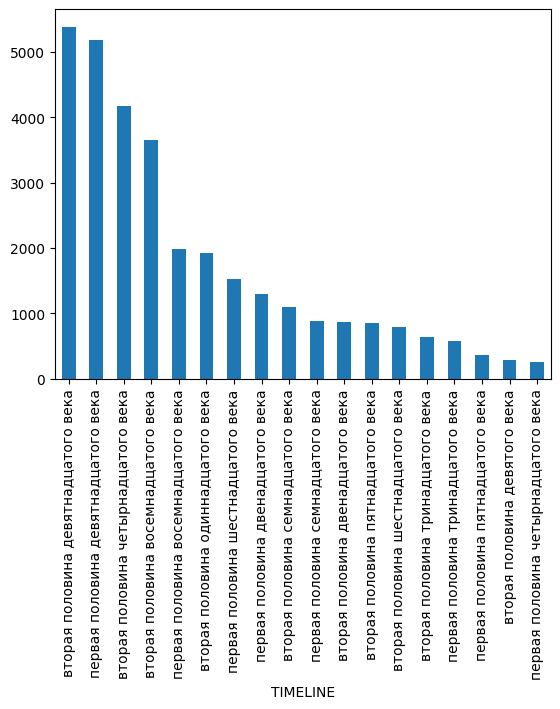

In [56]:
labels_df['TIMELINE'].value_counts().plot(kind='bar')

In [57]:
binarizer = MultiLabelBinarizer()
y = binarizer.fit_transform(labels_df['TUPLES'])
binarizer.classes_

array(['-', 'Акварель', 'Акварель на бумаге', 'Бронза', 'Витраж',
       'Гобелен', 'Гравюра', 'Дерево', 'Дуб', 'Камень', 'Карандаш',
       'Красный мел', 'Ксилография', 'Липа', 'Литография', 'Манускрипт',
       'Масло и темпера на дереве', 'Масло и темпера на красном буке',
       'Масло и темпера на липе', 'Масло и темпера на панели',
       'Масло на бумаге', 'Масло на дереве', 'Масло на дубе',
       'Масло на дубовой панели', 'Масло на картоне', 'Масло на меди',
       'Масло на панели', 'Масло на тополиной панели', 'Масло на холсте',
       'Масло на холсте, переведённое с дерева', 'Медь', 'Мрамор',
       'Ореховое масло на штукатурке', 'Отдельная фреска', 'Офорт',
       'Панель', 'Пастель', 'Пастель на бумаге', 'Перо',
       'Перо и коричневые чернила', 'Перо и чернила',
       'Перо и чернила на бумаге', 'Позолоченная бронза',
       'Раскрашенное дерево', 'Рисунок', 'Серебро', 'Слоновая кость',
       'Стукко', 'Темпера и золото на дереве',
       'Темпера и золото на пан

In [58]:
labels_df.to_csv('data/toy-art-data/labels_ru.csv', index=False)

In [59]:
y.shape

(31742, 114)

In [60]:
print(list(labels_df['TIMELINE'].unique()))

['вторая половина четырнадцатого века', 'первая половина восемнадцатого века', 'вторая половина шестнадцатого века', 'вторая половина пятнадцатого века', 'первая половина четырнадцатого века', 'первая половина пятнадцатого века', 'вторая половина девятого века', 'первая половина шестнадцатого века', 'вторая половина восемнадцатого века', 'вторая половина тринадцатого века', 'первая половина семнадцатого века', 'вторая половина семнадцатого века', 'вторая половина одиннадцатого века', 'первая половина девятнадцатого века', 'вторая половина девятнадцатого века', 'вторая половина двенадцатого века', 'первая половина тринадцатого века', 'первая половина двенадцатого века']
